# Bike Sharing Assignment

### Problem Statement

Build a multiple linear regression model for the prediction of demand for shared bikes for a US bike-sharing provider BoomBikes.

### Business Objectives/Goals

BoomBikes has following business goals -
-  To recover from considerable drop in revenues caused due to Corona pandemic
-  To accelerate revenue by predicting bike demands more accurately
-  Sustain operations by making huge profits
-  Stand out from other service providers

### Requirements

Understand the factors on which the demand for shared bikes depends. Specifically, understand the factors affecting the demand for shared bikes in the American market. 

1. Identify the variables which are significant in predicting the demand for shared bikes.
2. Describe how well those variables describe the bike demands.

### Expected Outcomes

1. Build a linear model that describes the effect of various features on demand for shared bikes.
2. The linear model that is built, should be interpretable by management and business.

### Steps Followed

1. Data Understanding
2. Data Preparation
3. Model Building
4. Model Evaluation

### Step 1: Reading and Understanding the Data

In [1]:
# Supress warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import libraries

import numpy as np
import pandas as pd

In [3]:
# Load data

day = pd.read_csv("day.csv")

In [4]:
# Display first few records

day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Display number of rows and columns

day.shape

(730, 16)

In [6]:
# Display information of the data such as datatypes, null values etc.

day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
# Display statistical summary of the data, especially for continuous variables

day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 2: Visualizing the Data

In [8]:
# Import libraries

import matplotlib.pyplot as plt
import seaborn as sns

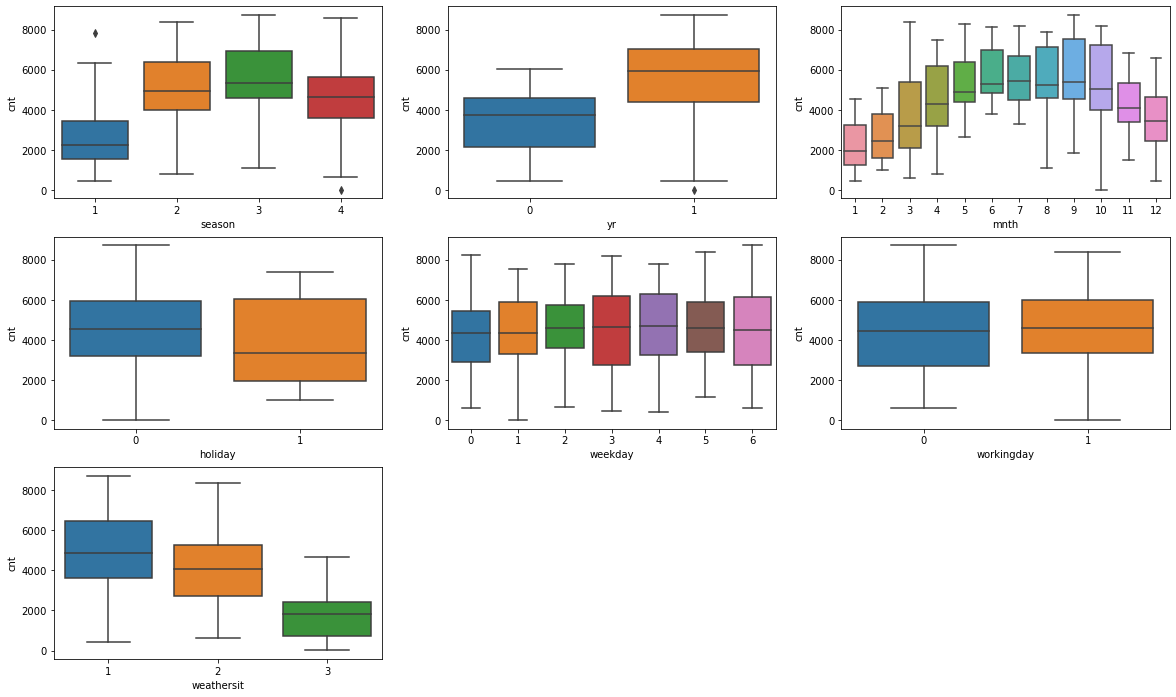

In [9]:
# Visualize categorical variables

plt.figure(figsize=(20,12))

plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=day)

plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=day)

plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=day)

plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=day)

plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=day)

plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=day)

plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=day)

plt.show()

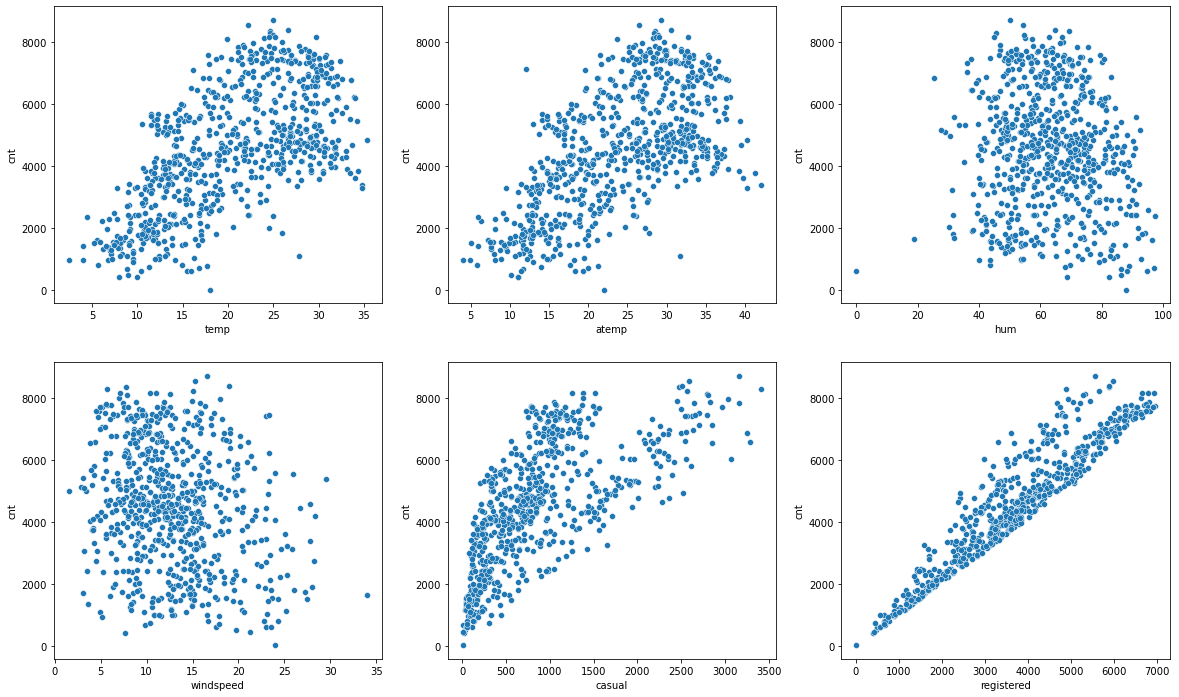

In [10]:
# Visualize continuous variables

plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.scatterplot(x='temp', y='cnt', data=day)

plt.subplot(2,3,2)
sns.scatterplot(x='atemp', y='cnt', data=day)

plt.subplot(2,3,3)
sns.scatterplot(x='hum', y='cnt', data=day)

plt.subplot(2,3,4)
sns.scatterplot(x='windspeed', y='cnt', data=day)

plt.subplot(2,3,5)
sns.scatterplot(x='casual', y='cnt', data=day)

plt.subplot(2,3,6)
sns.scatterplot(x='registered', y='cnt', data=day)

plt.show()

### Step 3: Data Preparation 

##### Impute values

In [11]:
# Impute values for column 'season'

day['season'] = day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})

In [12]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [13]:
# Impute values for column 'yr'

day['yr'] = day['yr'].map({0:'2018',1:'2019'})

In [14]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# Impute values for column 'mnth'

day['mnth'] = day['mnth'].map({1:'january',2:'february',3:'march',4:'april',5:'may',6:'june',
                               7:'july',8:'august',9:'september',10:'october',11:'november',12:'december'})

In [16]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,january,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,january,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,january,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,january,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,january,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [17]:
# Impute values for column 'weekday'

day['weekday'] = day['weekday'].map({0:'tuesday',1:'wednesday',2:'thursday',3:'friday',
                                     4:'saturday',5:'sunday',6:'monday'})

In [18]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,january,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,january,0,tuesday,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,january,0,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,january,0,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,january,0,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
# Impute values for column weathersit

day['weathersit'] = day['weathersit'].map({1:'clear',2:'mist',3:'light',4:'heavy'})

In [20]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,january,0,monday,0,mist,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,january,0,tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


##### Drop columns

In [21]:
# Drop 'instant' as the unique serial numbers will be of no help in the regression model

day.drop(['instant'], axis = 1, inplace = True)

In [22]:
# Drop 'dteday' as we have more useful 'yr', 'mnth' and 'weekday' representing the same 

day.drop(['dteday'], axis = 1, inplace = True)

In [23]:
# Drop 'casual' and 'registered' as both together represent 'cnt'

day.drop(['casual'], axis = 1, inplace = True)
day.drop(['registered'], axis = 1, inplace = True)

In [24]:
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,january,0,monday,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,january,0,tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600


##### Dummy variables

In [25]:
# Get the dummy variables for the feature 'season' and store it in a new variable - 'season_d'

season_d = pd.get_dummies(day['season'])

In [26]:
season_d.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [27]:
# Add the results to the original dataframe

day = pd.concat([day, season_d], axis = 1)

In [28]:
# Drop 'season' as we have created the dummies for it

day.drop(['season'], axis = 1, inplace = True)

In [29]:
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter
0,2018,january,0,monday,0,mist,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0
1,2018,january,0,tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0
2,2018,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0
3,2018,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0
4,2018,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0


In [30]:
# Get the dummy variables for the feature 'yr' and store it in a new variable - 'year'

year = pd.get_dummies(day['yr'], drop_first = True)

In [31]:
year.head()

,2019
0,0
1,0
2,0
3,0
4,0


In [32]:
# Add the results to the original dataframe

day = pd.concat([day, year], axis = 1)

In [33]:
# Drop 'yr' as we have created the dummies for it

day.drop(['yr'], axis = 1, inplace = True)

In [34]:
day.head()

,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,fall,spring,summer,winter,2019
0,january,0,monday,0,mist,14.110847,18.18125,80.5833,10.749882,985,0,1,0,0,0
1,january,0,tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,801,0,1,0,0,0
2,january,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,0,0
3,january,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,0,0
4,january,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,0,0


In [35]:
# Get the dummy variables for the feature 'mnth' and store it in a new variable - 'month'

month = pd.get_dummies(day['mnth'])

In [36]:
month.head()

,april,august,december,february,january,july,june,march,may,november,october,september
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [37]:
# Add the results to the original dataframe

day = pd.concat([day, month], axis = 1)

In [38]:
# Drop 'mnth' as we have created the dummies for it

day.drop(['mnth'], axis = 1, inplace = True)

In [39]:
day.head()

,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,fall,...,december,february,january,july,june,march,may,november,october,september
0,0,monday,0,mist,14.110847,18.18125,80.5833,10.749882,985,0,...,0,0,1,0,0,0,0,0,0,0
1,0,tuesday,0,mist,14.902598,17.68695,69.6087,16.652113,801,0,...,0,0,1,0,0,0,0,0,0,0
2,0,wednesday,1,clear,8.050924,9.47025,43.7273,16.636703,1349,0,...,0,0,1,0,0,0,0,0,0,0
3,0,thursday,1,clear,8.200000,10.60610,59.0435,10.739832,1562,0,...,0,0,1,0,0,0,0,0,0,0
4,0,friday,1,clear,9.305237,11.46350,43.6957,12.522300,1600,0,...,0,0,1,0,0,0,0,0,0,0


In [40]:
# Get the dummy variables for the feature 'weekday' and store it in a new variable - 'dow'

dow = pd.get_dummies(day['weekday'])

In [41]:
dow.head()

,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0
4,1,0,0,0,0,0,0


In [42]:
# Add the results to the original dataframe

day = pd.concat([day, dow], axis = 1)

In [43]:
# Drop 'weekday' as we have created the dummies for it

day.drop(['weekday'], axis = 1, inplace = True)

In [44]:
day.head()

,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,fall,spring,...,november,october,september,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,mist,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,0,1,...,0,0,0,1,0,0,0,0,0,0


In [45]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'weathersit_d'

weathersit_d = pd.get_dummies(day['weathersit'])

In [46]:
weathersit_d.head()

,clear,light,mist
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [47]:
# Add the results to the original dataframe

day = pd.concat([day, weathersit_d], axis = 1)

In [48]:
# Drop 'weathersit' as we have created the dummies for it

day.drop(['weathersit'], axis = 1, inplace = True)

In [49]:
day.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,...,friday,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light,mist
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,1,0,...,0,0,0,0,0,0,1,1,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,1,0,...,0,0,0,0,1,0,0,1,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,1,0,...,1,0,0,0,0,0,0,1,0,0


## Step 4: Splitting the Data into Training and Testing Sets

In [50]:
# Load library for Train-Test data split

from sklearn.model_selection import train_test_split

# Specify this to have train and test data same number of rows always

np.random.seed(0)
df_train, df_test = train_test_split(day, train_size=0.7, random_state=100)

In [51]:
df_train.shape

(510, 34)

In [52]:
df_test.shape

(220, 34)

##### Rescaling the features

In [53]:
# Load library for MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

In [54]:
scaler = MinMaxScaler()

In [55]:
# Apply scaler() to all continuous variables except dummy variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [56]:
df_train.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,...,friday,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light,mist
576,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,1,0,0,...,0,0,0,0,1,0,0,1,0,0
426,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,1,0,...,0,1,0,0,0,0,0,0,0,1
728,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,0,...,0,0,0,0,0,1,0,1,0,0
482,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,1,...,0,1,0,0,0,0,0,0,0,1
111,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,1,...,0,0,0,1,0,0,0,0,0,1


In [57]:
df_train.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,...,friday,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light,mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.262745,0.243137,0.247059,...,0.158824,0.154902,0.133333,0.127451,0.131373,0.143137,0.150980,0.625490,0.029412,0.345098
std,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.440557,0.429398,0.431725,...,0.365870,0.362166,0.340268,0.333805,0.338139,0.350557,0.358381,0.484471,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


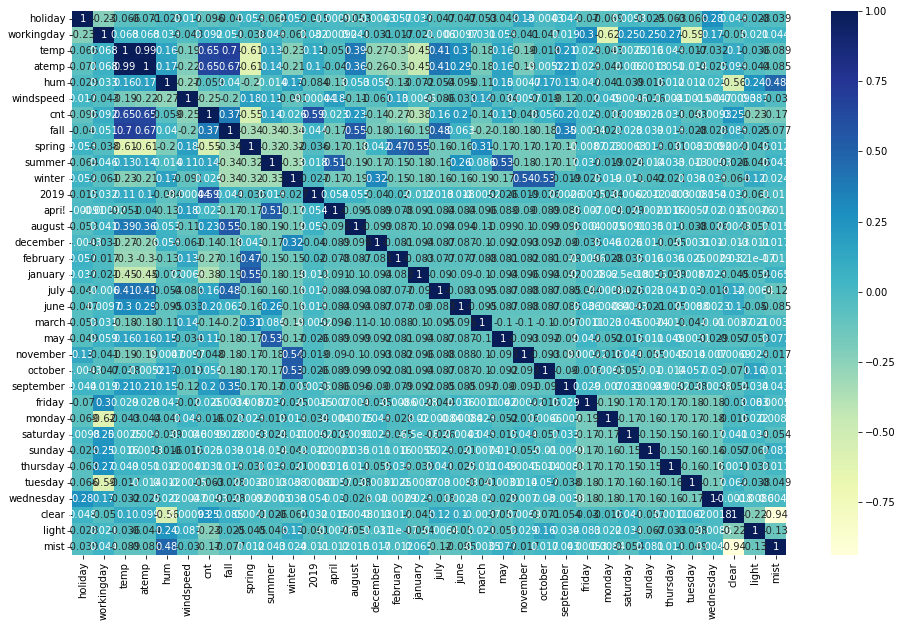

In [58]:
# Let's check the correlation coefficients to see which varibales are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [59]:
df_train.corr()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,...,friday,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light,mist
holiday,1.000000,-0.233863,-0.066405,-0.070760,-0.029224,0.017458,-0.095948,-0.040017,0.053339,-0.063798,...,-0.070276,-0.069242,9.759407e-03,-0.024505,-0.062897,-0.066102,0.279279,0.048032,-2.815377e-02,-0.038895
workingday,-0.233863,1.000000,0.068326,0.068349,0.032525,-0.042704,0.092019,0.050976,-0.037932,0.046302,...,0.300501,-0.619074,2.465943e-01,0.251739,0.268948,-0.591001,0.174565,-0.050176,2.115873e-02,0.043563
temp,-0.066405,0.068326,1.000000,0.989539,0.155252,-0.187281,0.645048,0.697012,-0.606396,0.126057,...,0.029020,-0.042608,2.518482e-03,0.015642,0.048662,-0.017367,-0.032455,0.100510,-3.622709e-02,-0.089452
atemp,-0.070760,0.068349,0.989539,1.000000,0.169341,-0.215108,0.647944,0.669431,-0.611118,0.136550,...,0.027554,-0.043785,6.021767e-03,0.001289,0.051493,-0.014223,-0.025473,0.099074,-4.439780e-02,-0.085086
hum,-0.029224,0.032525,0.155252,0.169341,1.000000,-0.267126,-0.058793,0.039925,-0.201616,-0.014192,...,0.046866,-0.040858,-3.853025e-02,-0.016457,0.012087,0.011915,0.022296,-0.556435,2.449653e-01,0.479436
windspeed,0.017458,-0.042704,-0.187281,-0.215108,-0.267126,1.000000,-0.253038,-0.195088,0.180351,0.110441,...,-0.019862,0.049063,-4.619727e-03,-0.016023,-0.004101,-0.001499,-0.004658,-0.000932,8.677832e-02,-0.029892
cnt,-0.095948,0.092019,0.645048,0.647944,-0.058793,-0.253038,1.000000,0.372210,-0.548987,0.140259,...,0.025468,-0.015998,9.927716e-03,0.024805,0.030528,-0.063214,-0.009333,0.245832,-2.266784e-01,-0.169715
fall,-0.040017,0.050976,0.697012,0.669431,0.039925,-0.195088,0.372210,1.000000,-0.338357,-0.341962,...,-0.003441,-0.021633,2.795870e-02,0.039030,0.018412,-0.027737,-0.027766,0.084539,-2.481685e-02,-0.077248
spring,0.053339,-0.037932,-0.606396,-0.611118,-0.201616,0.180351,-0.548987,-0.338357,1.000000,-0.324666,...,-0.008680,0.022641,6.274901e-03,0.016394,-0.030988,0.003276,-0.009212,0.004148,-4.455809e-02,0.011613
summer,-0.063798,0.046302,0.126057,0.136550,-0.014192,0.110441,0.140259,-0.341962,-0.324666,1.000000,...,0.037167,-0.019069,-2.407278e-02,-0.014435,0.032932,-0.013439,-0.000299,-0.026411,-4.590079e-02,0.043202


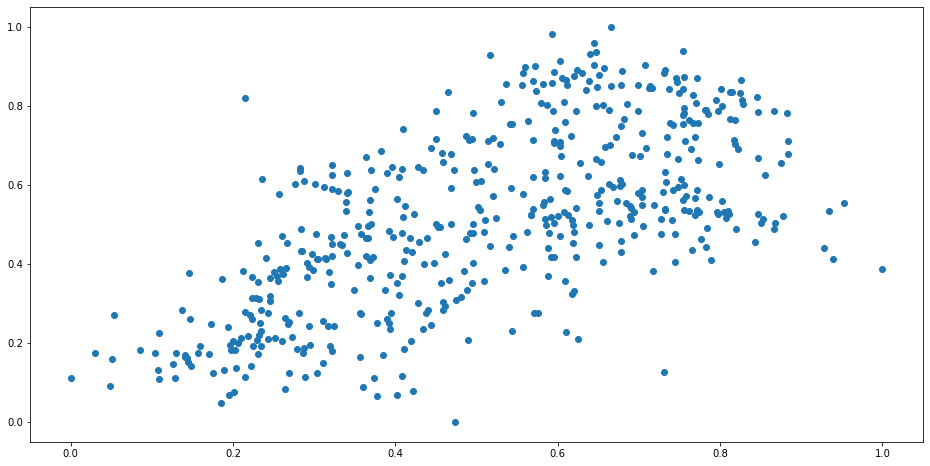

In [60]:
# Variable 'atemp' seems to be highly correlated with the 'cnt'. Let us see the pairplot of 'atemp' vs 'cnt'

plt.figure(figsize=(16,8))
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

So, we pick atemp as the first variable and we'll try to fit a regression line to that.

##### Dividing into X and y sets for model building

In [61]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`. In `statsmodels`, need to explicitly fit a constant using `sm.add_constant(X)`. If we don't perform this step, `statsmodels` fits a regression line passing through the origin, by default.

#### Model 1 - Starting with one variable

In [62]:
# Import library

import statsmodels.api as sm

In [63]:
# Add a constant

X_train_lm1 = sm.add_constant(X_train[['atemp']])

In [64]:
# Create a first fitted model

lr_1 = sm.OLS(y_train, X_train_lm1).fit()

In [65]:
# Check the parameters obtained

lr_1.params

const    0.162201
atemp    0.684584
dtype: float64

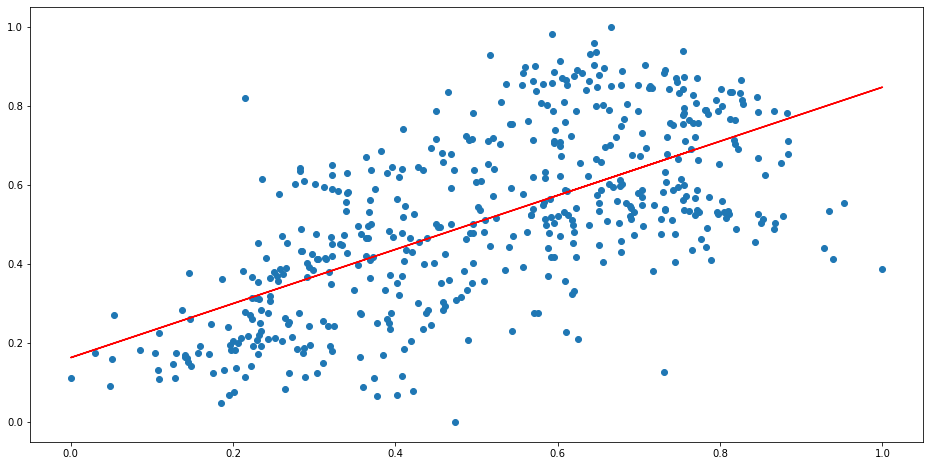

In [66]:
# Lets visualise the data with scatter plot and a fitted line

plt.figure(figsize=(16,8))
plt.scatter(X_train_lm1.iloc[:, 1], y_train)
plt.plot(X_train_lm1.iloc[:, 1], 0.163 + 0.684*X_train_lm1.iloc[:, 1], 'r')
plt.show()

In [67]:
# Print a summary of the linear model obtained

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     367.6
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           4.77e-62
Time:                        19:56:55   Log-Likelihood:                 177.73
No. Observations:                 510   AIC:                            -351.5
Df Residuals:                     508   BIC:                            -343.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1622      0.020      8.181      0.0

#### Model 2 - Adding another variable

The R-squared value obtained is `0.418`. Let's go ahead and add the second most highly correlated variable, i.e. `temp`.

In [68]:
# Assign all feature variables to X

X_train_lm2 = X_train[['atemp', 'temp']]

In [69]:
# Build a linear model

import statsmodels.api as sm
X_train_lm2 = sm.add_constant(X_train_lm2)

lr_2 = sm.OLS(y_train, X_train_lm2).fit()

In [70]:
# Check the parameters obtained

lr_2.params

const    0.162664
atemp    0.489566
temp     0.185345
dtype: float64

In [71]:
# Print a summary of the linear model obtained

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):           8.38e-61
Time:                        19:56:55   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.0

As adding 'temp' to the model did not afftect R-squared, also the p-value is higher than required. Hence we need to drop 'temp' from the model and add another variable.

#### Model 3 - Adding another variable

The R-squared value obtained in iteration 1 is `0.419`. Let's go ahead and add the next most highly correlated variable, i.e. `2019`.

In [72]:
# Assign all feature variables to X

X_train_lm3 = X_train[['atemp', '2019']]

In [73]:
# Build a linear model

import statsmodels.api as sm
X_train_lm3 = sm.add_constant(X_train_lm3)

lr_3 = sm.OLS(y_train, X_train_lm3).fit()

In [74]:
# Check the parameters obtained

lr_3.params

const    0.071787
atemp    0.625887
2019     0.237345
dtype: float64

In [75]:
# Print a summary of the linear model obtained

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.98e-132
Time:                        19:56:55   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.0

#### Model 4 - Adding another variable to the model

We have clearly improved the model as the value of adjusted R-squared as its value has gone up to 0.696 from 0.419. Let's go ahead and add more variables, 'fall' and 'clear'.

In [76]:
# Assign all the feature variables to X

X_train_lm4 = X_train[['atemp', '2019', 'clear']]

In [77]:
# Build a linear model

import statsmodels.api as sm
X_train_lm4 = sm.add_constant(X_train_lm4)

lr_4 = sm.OLS(y_train, X_train_lm4).fit()

In [78]:
# Check the parameters obtained

lr_4.params

const    0.031898
atemp    0.608331
2019     0.235632
clear    0.079566
dtype: float64

In [79]:
# Print the summary of the model

print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     447.0
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          8.25e-142
Time:                        19:56:55   Log-Likelihood:                 369.08
No. Observations:                 510   AIC:                            -730.2
Df Residuals:                     506   BIC:                            -713.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0319      0.015      2.095      0.0

We have improved the adjusted R-squared again and is now at '0.726'. Now let's go ahead and add all the feature variables.

#### Model 5 - Adding all the variables to the model

In [80]:
# Check all the columns of the dataframe

day.columns

Index(['holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'fall', 'spring', 'summer', 'winter', '2019', 'april', 'august',
       'december', 'february', 'january', 'july', 'june', 'march', 'may',
       'november', 'october', 'september', 'friday', 'monday', 'saturday',
       'sunday', 'thursday', 'tuesday', 'wednesday', 'clear', 'light', 'mist'],
      dtype='object')

In [81]:
# Build a linear model

import statsmodels.api as sm
X_train_lm5 = sm.add_constant(X_train)

lr_5 = sm.OLS(y_train, X_train_lm5).fit()

In [82]:
# Check the parameters obtained

lr_5.params

const         0.110651
holiday      -0.030314
workingday    0.055066
temp          0.387984
atemp         0.059045
hum          -0.152016
windspeed    -0.183604
fall          0.001639
spring       -0.043716
summer        0.044008
winter        0.108719
2019          0.232539
april         0.014411
august        0.036681
december     -0.029863
february     -0.017905
january      -0.048653
july         -0.018246
june          0.020423
march         0.015965
may           0.039951
november     -0.025408
october       0.022124
september     0.101171
friday        0.010191
monday        0.070059
saturday      0.006358
sunday        0.016088
thursday     -0.002350
tuesday       0.015840
wednesday    -0.005536
clear         0.141715
light        -0.113260
mist          0.082195
dtype: float64

In [83]:
# Print the summary of the model

print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          2.81e-180
Time:                        19:56:55   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1107      0.019      5.934      0.0

Looking at the p-values, it looks like some of the variables aren't really significant (in the presence of other variables).

We could simply drop the variable with the highest, non-significant p value. A better way would be to supplement this with the VIF information.

##### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [84]:
# Check the VIF values of the feature variables

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [85]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,holiday,inf
17,june,inf
31,light,inf
30,clear,inf
29,wednesday,inf
28,tuesday,inf
27,thursday,inf
26,sunday,inf
25,saturday,inf
24,monday,inf


#### Model 6 - Dropping the variables

We generally want a VIF that is less than 5. So we need to drop variables with VIF inf and those with higher VIF.

In [86]:
# Dropping variables with infinity VIFs

X_train = X_train.drop(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 
                       'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 
                       'summer', 'spring', 'fall', 'winter', 
                       'clear', 'mist', 'light',  
                       'workingday', 'holiday'], 1,)

In [87]:
# Build a third fitted model

X_train_lm6 = sm.add_constant(X_train)

lr_6 = sm.OLS(y_train, X_train_lm6).fit()

In [88]:
# Print the summary of the model

print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     282.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          9.98e-144
Time:                        19:56:55   Log-Likelihood:                 379.74
No. Observations:                 510   AIC:                            -747.5
Df Residuals:                     504   BIC:                            -722.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3131      0.032      9.920      0.0

In [89]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,341.72
0,temp,331.37
2,hum,8.37
3,windspeed,3.48
4,2019,2.00


#### Model 7 - Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `temp` as it has a very high p-value of `0.205`. Let's go ahead and drop this variable.

In [90]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('temp', 1,)

In [91]:
# Build a third fitted model

X_train_lm7 = sm.add_constant(X_train)

lr_7 = sm.OLS(y_train, X_train_lm7).fit()

In [92]:
# Print the summary of the model

print(lr_7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     352.8
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.11e-144
Time:                        19:56:55   Log-Likelihood:                 378.93
No. Observations:                 510   AIC:                            -747.9
Df Residuals:                     505   BIC:                            -726.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3109      0.032      9.859      0.0

In [93]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,hum,8.20
0,atemp,6.50
2,windspeed,3.39
3,2019,2.00


#### Model 8 - Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values as well as high p-values. Such variables are insignificant and should be dropped.

As you might have noticed, the variable `workingday` has a high p-value (`0.125`). Hence, this variable isn't of much use and should be dropped.

In [94]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('hum', 1,)

In [95]:
# Build a third fitted model

X_train_lm8 = sm.add_constant(X_train)

lr_8 = sm.OLS(y_train, X_train_lm8).fit()

In [96]:
# Print the summary of the model

print(lr_8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     419.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          7.85e-137
Time:                        19:56:55   Log-Likelihood:                 357.51
No. Observations:                 510   AIC:                            -707.0
Df Residuals:                     506   BIC:                            -690.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1424      0.020      7.276      0.0

In [97]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,3.03
1,windspeed,2.65
2,2019,1.98


#### Model 9 - Dropping the Variable and Updating the Model

As you can notice some of the variable have high VIF values. Such variables are insignificant and should be dropped.
As you might have noticed, the variable 'hum' has a high VIF (10.65). Hence, this variable isn't of much use and should be dropped.

In [98]:
# Dropping highly correlated variables and insignificant variables

X_train = X_train.drop('windspeed', 1,)

In [99]:
# Build a third fitted model

X_train_lm9 = sm.add_constant(X_train)

lr_9 = sm.OLS(y_train, X_train_lm9).fit()

In [100]:
# Print the summary of the model

print(lr_9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     582.7
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          3.98e-132
Time:                        19:56:55   Log-Likelihood:                 343.25
No. Observations:                 510   AIC:                            -680.5
Df Residuals:                     507   BIC:                            -667.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0718      0.015      4.802      0.0

In [101]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,atemp,1.89
1,2019,1.89


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [102]:
y_train_pred = lr_4.predict(X_train_lm4)

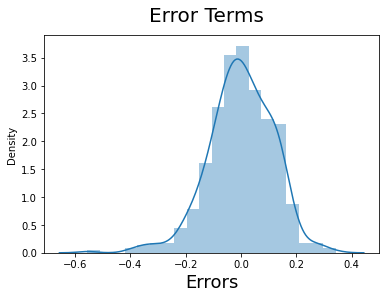

In [103]:
# Plot the histogram of the error terms

fig = plt.figure()
res = y_train - y_train_pred 
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

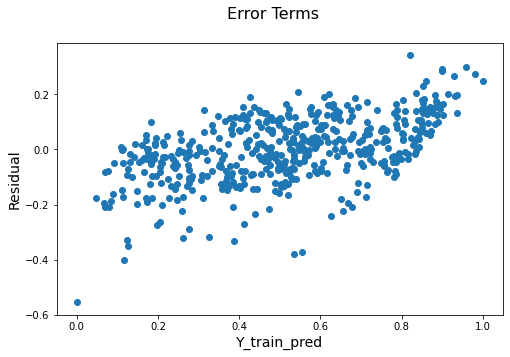

In [104]:
# Error terms train set

fig = plt.figure(figsize=(8,5))
plt.scatter(y_train,res)
fig.suptitle('Error Terms', fontsize=16)              # Plot heading 
plt.xlabel('Y_train_pred', fontsize=14)               # X-label
plt.ylabel('Residual', fontsize=14) 
plt.show()

Insights:

-  It seems like the corresponding residual plot is reasonably random.
-  Also the error terms satisfies to have reasonably constant variance (homoscedasticity)

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [105]:
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [106]:
df_test.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,fall,spring,summer,...,friday,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light,mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.245455,0.254545,0.263636,...,0.100000,0.118182,0.163636,0.177273,0.168182,0.145455,0.127273,0.654545,0.027273,0.318182
std,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.431338,0.436599,0.441609,...,0.300684,0.323559,0.370789,0.382770,0.374881,0.353363,0.334038,0.476601,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [107]:
y_test = df_test.pop('cnt')
X_test = df_test

In [108]:
# Adding constant variable to test dataframe

X_test_m4 = sm.add_constant(X_test)

In [109]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4

X_test_m4 = X_test_m4.drop(['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december', 
                            'monday', 'tuesday', 'wednesday', 'thursday', 'friday', 'saturday', 'sunday', 
                            'summer', 'spring', 'fall', 'winter', 
                            'mist', 'light',  
                            'workingday', 'holiday', 
                            'hum', 'temp', 'windspeed'], axis = 1)

In [110]:
# Making predictions using the fourth model

y_test_pred = lr_4.predict(X_test_m4)

In [111]:
# Evaluate r2_score

from sklearn.metrics import r2_score

r2_score(y_true=y_test, y_pred=y_test_pred)

0.6965890044155036

The R-Squared on the test data (0.697) is very close to the R-Squared on the train data (0.726).

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

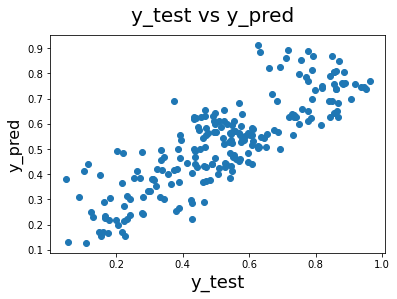

In [112]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

##### Model Interpretation


We can see that the equation of our best fitted line is:

$ cnt = 0.6072  \times  atemp + 0.2358  \times  2019 + 0.0812 \times clear $

The demand of bikes is 72% explainable through following data variables:
1.  Actual temperature
2.  Time in market (After a year, in 2019, the demand increased than the previous year)
3.  Clear weather

Overall we have a decent model with R-squared = 0.726 and Adjusted R-Squared = 0.724.